# Capstone - Delivery-4
This dataset is part of the [Farming Systems Project](https://www.ars.usda.gov/northeast-area/beltsville-md-barc/beltsville-agricultural-research-center/sustainable-agricultural-systems-laboratory/docs/farming-systems-project/) at USDA, Beltsville MD.  This data is not available online on the USDA
 website but can be found on my [GitHub](https://github.com/mmtokay/DATA606/tree/master/dataset)
* Julian Day 
* Month
* Day
* Date
* avgtTempC - average temperature in C
* maxTempC - maximum temperature in C
* minTempC - minimum temperature in C
* maxHumPct - maximum humidity in %
* minHumPct - minimum humidity in %
* avgRadWm-2 - average radiation in w/m2
* meanWindMs-1 - mean wind in m/s
* PrecipitationMm - precipitation/snow me# Model A

In [0]:
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-7xm9wx60
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-7xm9wx60
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0614b609854294e27c35c8eda36fc1b263b6cb3d4_-cp36-none-any.whl size=100462 sha256=3e906143fd6171a4cc7ed122ed93446d9a16a4a215cef6f76d29f6adf48c5ea1
  Stored in directory: /tmp/pip-ephem-wheel-cache-arvwvoiz/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import warnings
import time
import pathlib
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from datetime import datetime, timedelta
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler, Normalizer, MinMaxScaler, StandardScaler, Binarizer
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.utils import shuffle
from time import time
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

print(tf.__version__)
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
2.2.0-rc4


In [0]:
def modelEvaluation(test_y, y_pred):
    # Mean absolute error regression loss (Best is 0)
    mae = mean_absolute_error(test_y, y_pred)
    print("Mean absolute error regression loss (Best is 0) = {:.5f}".format(mae))
    
    # Mean squared error
    mse = mean_squared_error(test_y, y_pred)
    print("Mean squared error (Best is 0) = {:.5f}".format(mse))
    
    # Median absolute error regression loss
    maerl = median_absolute_error(test_y, y_pred)
    print("Median absolute error regression loss or Mean absolute percentage error (Best is 0) = {:.5f}".format(maerl))
    
    # Coefficient of determination (Best is 1)
    r2 = r2_score(y_pred, test_y)
    print("Coefficient of determination (Best is 1) = {:.5f}".format(r2))

    a = plt.axes(aspect='equal')
    plt.scatter(test_y, y_pred)
    plt.xlabel('True Values [GrainYield]')
    plt.ylabel('Predictions [GrainYield]')
    lims = [0, 13000]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)


def errorPlot(test_y, y_pred):
    error = y_pred - test_y
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error [GrainYield]")
    _ = plt.ylabel("Count")

# Corn - 16 weeks

In [0]:
dataCorn16w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/cornFeatures16w.csv')
corrCorn16w = dataCorn16w.corr()
corrCorn16w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_16w_X, test_16w_X = train_test_split(dataCorn16w.drop('GrainYield', axis=1), random_state=1)
train_16w_y, test_16w_y = train_test_split(dataCorn16w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_16w_X = scaler.fit_transform(train_16w_X)
test_scaler_16w_X = scaler.transform(test_16w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79005086.66108185, tolerance: 335972.59120006737
  positive)


Mean absolute error regression loss (Best is 0) = 929.76553
Mean squared error (Best is 0) = 1387906.98653
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 786.62127
Coefficient of determination (Best is 1) = 0.82511
SystemNameType    2319.836387
minHum11          1407.205264
minHum12          1067.103539
minHum7            880.925562
minTemp4           822.752612
dtype: float64
minTemp1     -822.860370
maxTemp9     -875.842708
Precip16    -1347.742009
maxTemp10   -1495.771385
maxHum1     -2054.276204
dtype: float64


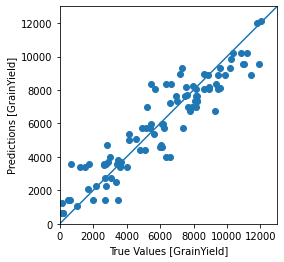

In [0]:
lm = linear_model.Lasso(alpha=0.9)
lm.fit(train_scaler_16w_X,train_16w_y)
y_pred_16w_lm = lm.predict(test_scaler_16w_X)

modelEvaluation(test_16w_y, y_pred_16w_lm)
important_features = pd.Series(data=lm.coef_,index=dataCorn16w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

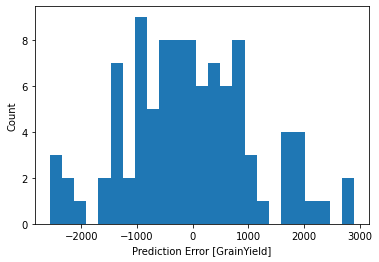

In [0]:
errorPlot(test_16w_y, y_pred_16w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 930.40608
Mean squared error (Best is 0) = 1408752.93658
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 715.18750
Coefficient of determination (Best is 1) = 0.82596
maxTemp9          0.452970
avgTemp11         0.185643
maxTemp6          0.088978
SystemNameType    0.065286
minHum11          0.041612
dtype: float64
meanWind11    0.0
avgTemp12     0.0
minTemp12     0.0
maxHum12      0.0
avgTemp1      0.0
dtype: float64


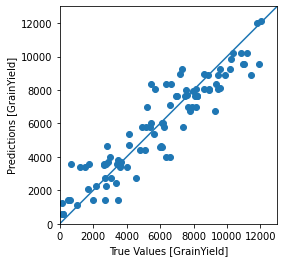

In [0]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_16w_X,train_16w_y)
y_pred_16w_dtr = tree_model.predict(test_scaler_16w_X)

modelEvaluation(test_16w_y, y_pred_16w_dtr)
important_features = pd.Series(data=tree_model.feature_importances_,index=dataCorn16w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

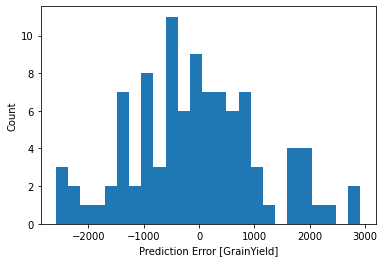

In [0]:
errorPlot(test_16w_y, y_pred_16w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 918.62877
Mean squared error (Best is 0) = 1366405.15331
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 740.33197
Coefficient of determination (Best is 1) = 0.82953
maxTemp9          0.207233
maxTemp6          0.196010
maxTemp11         0.071957
maxTemp8          0.046744
SystemNameType    0.041398
dtype: float64
avgTemp8     0.000176
meanWind5    0.000174
avgTemp6     0.000142
avgTemp4     0.000120
avgTemp16    0.000052
dtype: float64


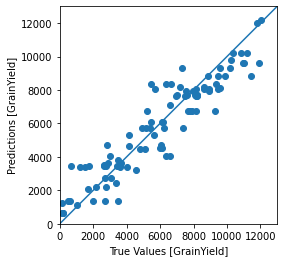

In [0]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_16w_X,train_16w_y)

y_pred_16w_rfr = rf_model.predict(test_scaler_16w_X)
modelEvaluation(test_16w_y, y_pred_16w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn16w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

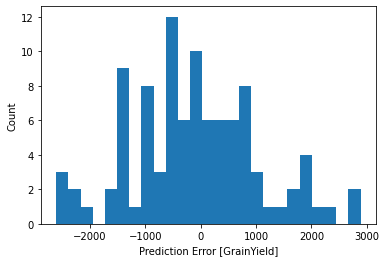

In [0]:
errorPlot(test_16w_y, y_pred_16w_rfr)

Mean absolute error regression loss (Best is 0) = 929.57427
Mean squared error (Best is 0) = 1400149.28866
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 734.64821
Coefficient of determination (Best is 1) = 0.82440
maxTemp6          0.240497
maxTemp9          0.208839
maxTemp8          0.061533
SystemNameType    0.042284
maxTemp1          0.030998
dtype: float64
avgTemp6     0.000238
meanWind3    0.000185
meanWind6    0.000182
avgTemp8     0.000157
maxHum13     0.000155
dtype: float64


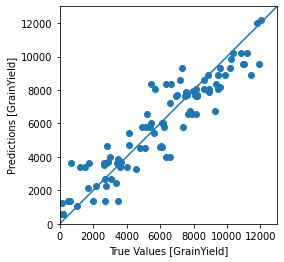

In [0]:
max_depth = 30
n_est = 200
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_16w_X,train_16w_y)
y_pred_16w_rfrc = rf_model.predict(test_scaler_16w_X)
modelEvaluation(test_16w_y, y_pred_16w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn16w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

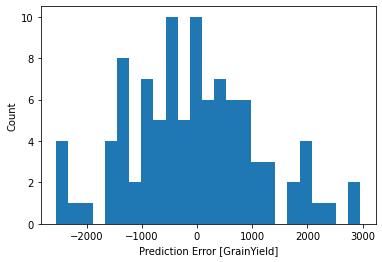

In [0]:
errorPlot(test_16w_y, y_pred_16w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_16w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

Thease are results that I got when trying different optimizers. The best one was RMSprop.


optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.9)

Mean absolute error regression loss (Best is 0) = 988.04268

Mean squared error (Best is 0) = 1607740.15541

Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 759.51094

Coefficient of determination (Best is 1) = 0.82419


---
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

Mean absolute error regression loss (Best is 0) = 995.84217

Mean squared error (Best is 0) = 1498847.28905

Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 888.22495

Coefficient of determination (Best is 1) = 0.80990



---
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

Mean absolute error regression loss (Best is 0) = 1006.28192

Mean squared error (Best is 0) = 1647878.01326

Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 811.88018

Coefficient of determination (Best is 1) = 0.77732



---

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
Mean absolute error regression loss (Best is 0) = 982.63614

Mean squared error (Best is 0) = 1479295.82364

Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 894.45721

Coefficient of determination (Best is 1) = 0.81385


---

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

Mean absolute error regression loss (Best is 0) = 956.51279

Mean squared error (Best is 0) = 1532729.52835

Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 744.18901

Coefficient of determination (Best is 1) = 0.82001

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               14720     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                5

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [0]:
EPOCHS = 200
history = model.fit(train_scaler_16w_X, train_16w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43494840.0000,  mae:5646.4746,  mse:43494840.0000,  val_loss:44365128.0000,  val_mae:5770.5903,  val_mse:44365128.0000,  
....................................................................................................
Epoch: 100, loss:956546.5000,  mae:779.4828,  mse:956546.5000,  val_loss:1346394.7500,  val_mae:900.2321,  val_mse:1346394.7500,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

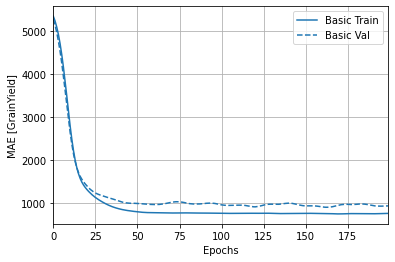

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

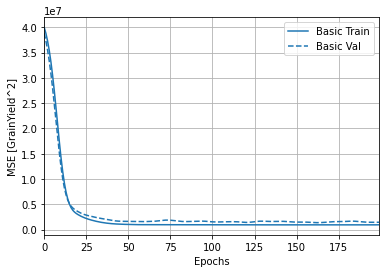

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
early_history = model.fit(train_scaler_16w_X, train_16w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43367732.0000,  mae:5636.7246,  mse:43367732.0000,  val_loss:43741352.0000,  val_mae:5723.0684,  val_mse:43741352.0000,  
...........................................

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [0]:
loss, mae, mse = model.evaluate(test_scaler_16w_X, test_16w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 1589253.5000 - mae: 1029.5831 - mse: 1589253.5000
Testing set Mean Abs Error: 1029.58 GrainYield


***Make predictions***

Finally, predict GrainYield values using data in the testing set:

In [0]:
y_pred_16w_nn = model.predict(test_scaler_16w_X).flatten()

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

Mean absolute error regression loss (Best is 0) = 1029.58314
Mean squared error (Best is 0) = 1589253.65550
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 871.70819
Coefficient of determination (Best is 1) = 0.78988


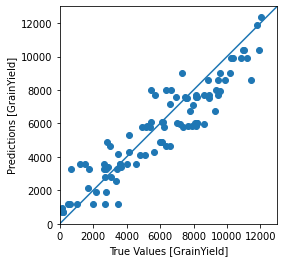

In [0]:
modelEvaluation(test_16w_y, y_pred_16w_nn)

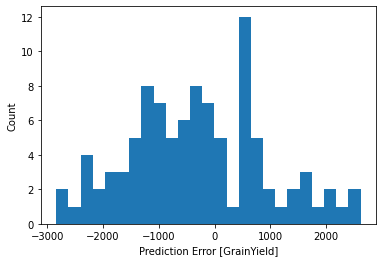

In [0]:
errorPlot(test_16w_y, y_pred_16w_nn)

# Corn - 15 weeks

In [0]:
dataCorn15w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/cornFeatures15w.csv')
corrCorn15w = dataCorn15w.corr()
corrCorn15w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_15w_X, test_15w_X = train_test_split(dataCorn15w.drop('GrainYield', axis=1), random_state=1)
train_15w_y, test_15w_y = train_test_split(dataCorn15w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_15w_X = scaler.fit_transform(train_15w_X)
test_scaler_15w_X = scaler.transform(test_15w_X)

**Lasso**

Mean absolute error regression loss (Best is 0) = 928.92208
Mean squared error (Best is 0) = 1385728.35120
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 780.00143
Coefficient of determination (Best is 1) = 0.82544
minHum11          2376.084779
SystemNameType    2323.601256
minTemp14         1754.199368
minTemp9          1412.943131
minHum12          1055.453558
dtype: float64
minTemp10    -945.563374
minHum14     -997.792877
maxHum1     -1014.660112
minHum3     -1701.739224
maxTemp10   -2084.566856
dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69424596.52215722, tolerance: 335972.59120006737
  positive)


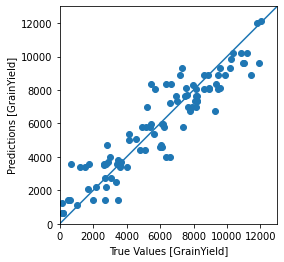

In [0]:
lm = linear_model.Lasso(alpha=0.8)
lm.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_lm = lm.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_lm)

important_features = pd.Series(data=lm.coef_,index=dataCorn15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

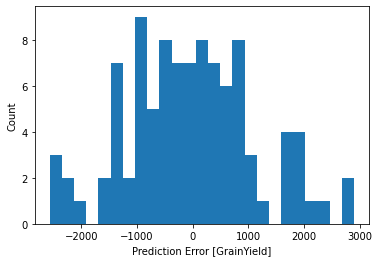

In [0]:
errorPlot(test_15w_y, y_pred_15w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 930.40608
Mean squared error (Best is 0) = 1408752.93658
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 715.18750
Coefficient of determination (Best is 1) = 0.82596
maxTemp9          0.452970
avgTemp15         0.185643
maxTemp6          0.088962
SystemNameType    0.065286
minHum11          0.041612
dtype: float64
avgTemp10     0.0
maxHum10      0.0
minHum10      0.0
meanWind10    0.0
avgTemp1      0.0
dtype: float64


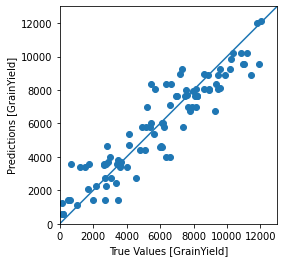

In [0]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_dtr = tree_model.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_dtr)

important_features = pd.Series(data=tree_model.feature_importances_,index=dataCorn15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

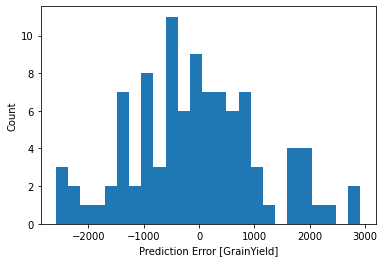

In [0]:
errorPlot(test_15w_y, y_pred_15w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 925.77989
Mean squared error (Best is 0) = 1386072.96923
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 763.21358
Coefficient of determination (Best is 1) = 0.82589
maxTemp9          0.213625
maxTemp6          0.196036
maxTemp11         0.069906
maxTemp8          0.055620
SystemNameType    0.044320
dtype: float64
avgTemp10    0.000177
maxHum9      0.000174
meanWind8    0.000152
avgTemp4     0.000112
meanWind3    0.000050
dtype: float64


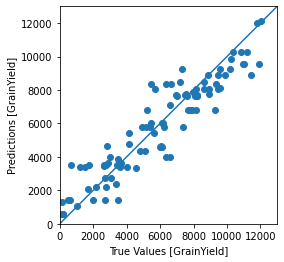

In [0]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_rfr = rf_model.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

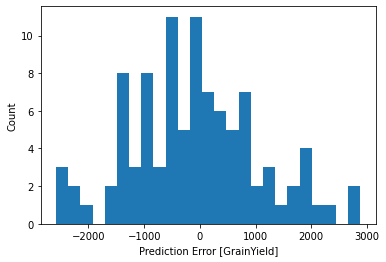

In [0]:
errorPlot(test_15w_y, y_pred_15w_rfr)

Mean absolute error regression loss (Best is 0) = 928.34131
Mean squared error (Best is 0) = 1400101.89330
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 734.64821
Coefficient of determination (Best is 1) = 0.82450
maxTemp6          0.241028
maxTemp9          0.209598
maxTemp8          0.063157
SystemNameType    0.043898
maxTemp1          0.033158
dtype: float64
meanWind4    0.000313
meanWind3    0.000298
meanWind5    0.000252
minHum13     0.000146
avgTemp7     0.000112
dtype: float64


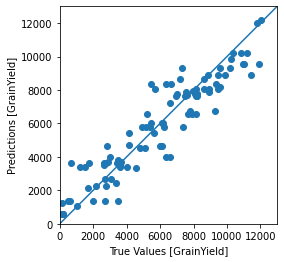

In [0]:
max_depth = 20
n_est = 200
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_15w_X,train_15w_y)
y_pred_15w_rfrc = rf_model.predict(test_scaler_15w_X)
modelEvaluation(test_15w_y, y_pred_15w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn15w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

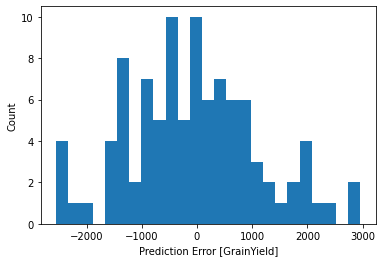

In [0]:
errorPlot(test_15w_y, y_pred_15w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_15w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               13824     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [0]:
EPOCHS = 200
history = model.fit(train_scaler_15w_X, train_15w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43407288.0000,  mae:5639.8906,  mse:43407288.0000,  val_loss:43829796.0000,  val_mae:5730.0723,  val_mse:43829796.0000,  
....................................................................................................
Epoch: 100, loss:926537.7500,  mae:755.1269,  mse:926537.7500,  val_loss:1903998.6250,  val_mae:1072.7550,  val_mse:1903998.6250,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

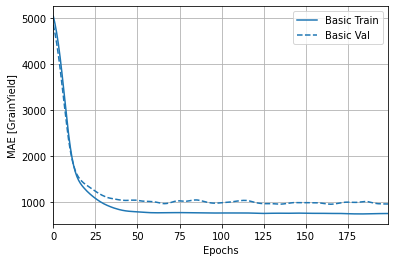

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

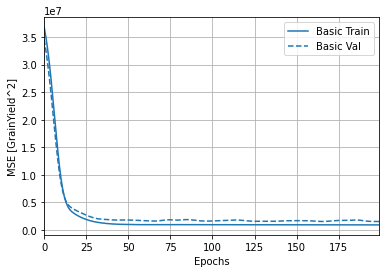

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(train_scaler_15w_X, train_15w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43444628.0000,  mae:5642.3638,  mse:43444628.0000,  val_loss:44068456.0000,  val_mae:5747.8389,  val_mse:44068456.0000,  
........................................................

In [0]:
loss, mae, mse = model.evaluate(test_scaler_15w_X, test_15w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 2606794.0000 - mae: 1230.3491 - mse: 2606794.0000
Testing set Mean Abs Error: 1230.35 GrainYield


Mean absolute error regression loss (Best is 0) = 1230.34920
Mean squared error (Best is 0) = 2606794.47055
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 932.96697
Coefficient of determination (Best is 1) = 0.62722


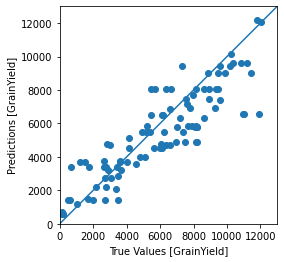

In [0]:
y_pred_15w_nn = model.predict(test_scaler_15w_X).flatten()
modelEvaluation(test_15w_y, y_pred_15w_nn)

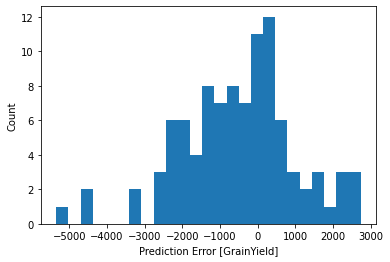

In [0]:
errorPlot(test_15w_y, y_pred_15w_nn)

# Corn - 14 weeks

In [0]:
dataCorn14w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/cornFeatures14w.csv')
corrCorn14w = dataCorn14w.corr()
corrCorn14w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_14w_X, test_14w_X = train_test_split(dataCorn14w.drop('GrainYield', axis=1), random_state=1)
train_14w_y, test_14w_y = train_test_split(dataCorn14w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_14w_X = scaler.fit_transform(train_14w_X)
test_scaler_14w_X = scaler.transform(test_14w_X)

**Lasso**

Mean absolute error regression loss (Best is 0) = 928.30007
Mean squared error (Best is 0) = 1383978.44023
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 774.76807
Coefficient of determination (Best is 1) = 0.82555
minHum11          2699.436665
SystemNameType    2349.805066
minTemp14         1630.883310
minTemp4          1227.536431
Precip6           1097.804954
dtype: float64
maxHum1      -932.683063
minHum14     -942.727910
minTemp7     -943.045790
minHum3     -1681.064211
maxTemp10   -2608.245327
dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72171058.88471356, tolerance: 335972.59120006737
  positive)


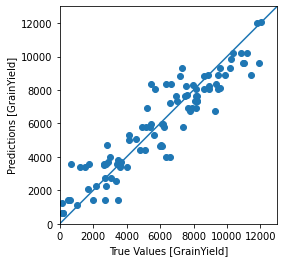

In [0]:
lm = linear_model.Lasso(alpha=0.9)
lm.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_lm = lm.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_lm)

important_features = pd.Series(data=lm.coef_,index=dataCorn14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

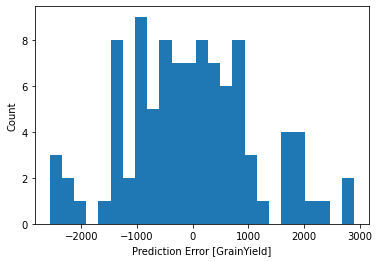

In [0]:
errorPlot(test_14w_y, y_pred_14w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 930.40608
Mean squared error (Best is 0) = 1408752.93658
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 715.18750
Coefficient of determination (Best is 1) = 0.82596
minHum11          2699.436665
SystemNameType    2349.805066
minTemp14         1630.883310
minTemp4          1227.536431
Precip6           1097.804954
dtype: float64
maxHum1      -932.683063
minHum14     -942.727910
minTemp7     -943.045790
minHum3     -1681.064211
maxTemp10   -2608.245327
dtype: float64


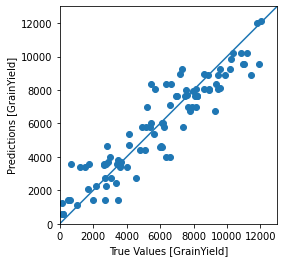

In [0]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_dtr = tree_model.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataCorn14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

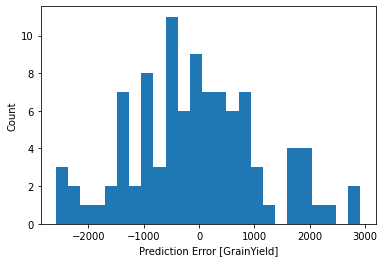

In [0]:
errorPlot(test_14w_y, y_pred_14w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 925.97063
Mean squared error (Best is 0) = 1391401.77688
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 739.68033
Coefficient of determination (Best is 1) = 0.82486
maxTemp6          0.238298
maxTemp9          0.196732
maxTemp8          0.057776
maxTemp11         0.045231
SystemNameType    0.044125
dtype: float64
avgTemp9     0.000356
maxHum7      0.000355
maxHum12     0.000277
GDD          0.000208
meanWind3    0.000184
dtype: float64


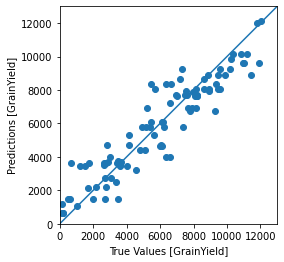

In [0]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_rfr = rf_model.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

Mean absolute error regression loss (Best is 0) = 926.89584
Mean squared error (Best is 0) = 1397395.85845
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 730.69283
Coefficient of determination (Best is 1) = 0.82509
maxTemp6          0.242604
maxTemp9          0.207332
maxTemp8          0.064388
SystemNameType    0.047125
maxTemp1          0.032656
dtype: float64
maxHum9      0.000427
maxHum2      0.000357
maxHum5      0.000312
maxHum7      0.000237
meanWind4    0.000184
dtype: float64


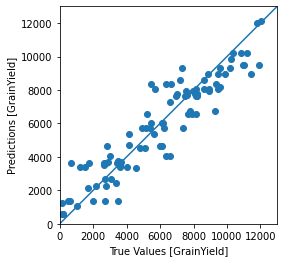

In [0]:
max_depth = 20
n_est = 190
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_14w_X,train_14w_y)
y_pred_14w_rfrc = rf_model.predict(test_scaler_14w_X)
modelEvaluation(test_14w_y, y_pred_14w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn14w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

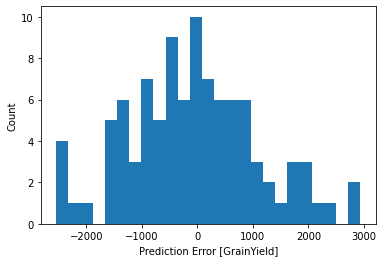

In [0]:
errorPlot(test_14w_y, y_pred_14w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_14w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [0]:
EPOCHS = 200
history = model.fit(train_scaler_14w_X, train_14w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43482272.0000,  mae:5645.5249,  mse:43482272.0000,  val_loss:44310864.0000,  val_mae:5766.5854,  val_mse:44310864.0000,  
....................................................................................................
Epoch: 100, loss:893165.8125,  mae:742.9352,  mse:893165.8125,  val_loss:1516531.6250,  val_mae:968.1005,  val_mse:1516531.5000,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

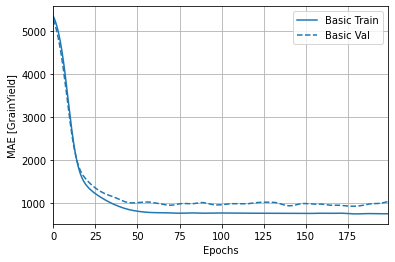

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

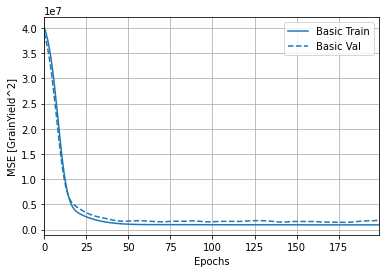

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(train_scaler_14w_X, train_14w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43487480.0000,  mae:5645.9399,  mse:43487480.0000,  val_loss:44312128.0000,  val_mae:5766.6143,  val_mse:44312128.0000,  
....................................................................................................
Epoch: 100, loss:988752.3125,  mae:782.6915,  mse:988752.3125,  val_loss:1493290.6250,  val_mae:945.3229,  val_mse:1493290.6250,  
...........................................

In [0]:
loss, mae, mse = model.evaluate(test_scaler_14w_X, test_14w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 1595114.2500 - mae: 1009.0008 - mse: 1595114.2500
Testing set Mean Abs Error: 1009.00 GrainYield


Mean absolute error regression loss (Best is 0) = 1009.00085
Mean squared error (Best is 0) = 1595114.22473
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 799.25840
Coefficient of determination (Best is 1) = 0.79138


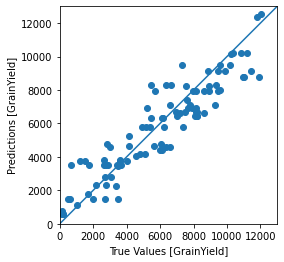

In [0]:
y_pred_14w_nn = model.predict(test_scaler_14w_X).flatten()
modelEvaluation(test_14w_y, y_pred_14w_nn)

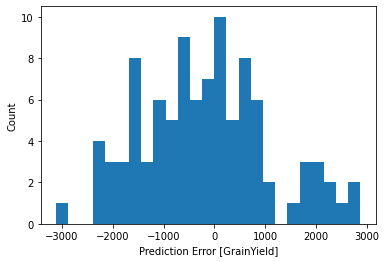

In [0]:
errorPlot(test_14w_y, y_pred_14w_nn)

# Corn - 13 weeks

In [0]:
dataCorn13w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/cornFeatures13w.csv')
corrCorn13w = dataCorn13w.corr()
corrCorn13w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_13w_X, test_13w_X = train_test_split(dataCorn13w.drop('GrainYield', axis=1), random_state=1)
train_13w_y, test_13w_y = train_test_split(dataCorn13w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_13w_X = scaler.fit_transform(train_13w_X)
test_scaler_13w_X = scaler.transform(test_13w_X)

**Lasso**

Mean absolute error regression loss (Best is 0) = 925.89497
Mean squared error (Best is 0) = 1380373.43671
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 771.45137
Coefficient of determination (Best is 1) = 0.82609
SystemNameType    2363.997949
minTemp9          1523.089320
minHum11          1345.055657
Precip6           1293.044201
minHum7           1249.496944
dtype: float64
Precip8      -977.115743
Precip3      -997.856782
minTemp7    -1477.283798
minHum3     -2001.264620
maxTemp10   -2977.364454
dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108269624.58266404, tolerance: 335972.59120006737
  positive)


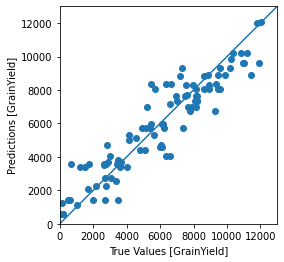

In [0]:
lm = linear_model.Lasso(alpha=0.9)
lm.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_lm = lm.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_lm)

important_features = pd.Series(data=lm.coef_,index=dataCorn13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

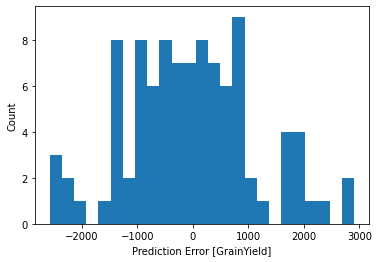

In [0]:
errorPlot(test_13w_y, y_pred_13w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 930.40608
Mean squared error (Best is 0) = 1408752.93658
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 715.18750
Coefficient of determination (Best is 1) = 0.82596
SystemNameType    2363.997949
minTemp9          1523.089320
minHum11          1345.055657
Precip6           1293.044201
minHum7           1249.496944
dtype: float64
Precip8      -977.115743
Precip3      -997.856782
minTemp7    -1477.283798
minHum3     -2001.264620
maxTemp10   -2977.364454
dtype: float64


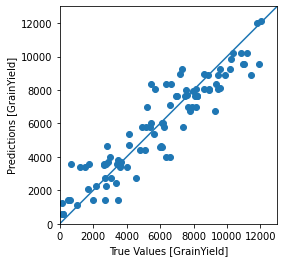

In [0]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_dtr = tree_model.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataCorn13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

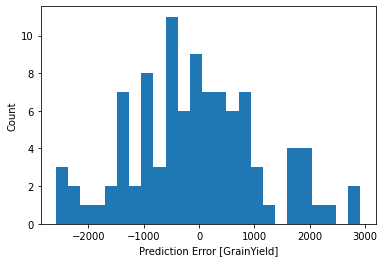

In [0]:
errorPlot(test_13w_y, y_pred_13w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 927.39994
Mean squared error (Best is 0) = 1386324.85134
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 765.21134
Coefficient of determination (Best is 1) = 0.82642
maxTemp6          0.229741
maxTemp9          0.224209
maxTemp8          0.061963
SystemNameType    0.048019
maxTemp11         0.039066
dtype: float64
maxHum11     0.000391
maxHum5      0.000352
avgTemp4     0.000283
meanWind3    0.000215
meanWind5    0.000116
dtype: float64


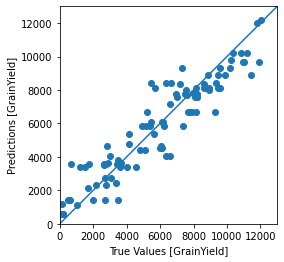

In [0]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_rfr = rf_model.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

Mean absolute error regression loss (Best is 0) = 927.28309
Mean squared error (Best is 0) = 1395026.37673
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 726.61921
Coefficient of determination (Best is 1) = 0.82515
maxTemp6          0.242998
maxTemp9          0.206389
maxTemp8          0.064577
SystemNameType    0.047064
maxTemp1          0.033078
dtype: float64
maxHum13     0.000448
maxHum5      0.000423
meanWind7    0.000367
meanWind5    0.000344
meanWind3    0.000214
dtype: float64


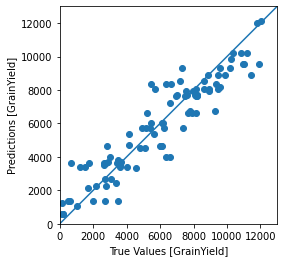

In [0]:
max_depth = 20
n_est = 190
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_13w_X,train_13w_y)
y_pred_13w_rfrc = rf_model.predict(test_scaler_13w_X)
modelEvaluation(test_13w_y, y_pred_13w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataCorn13w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

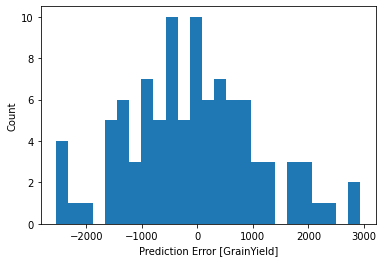

In [0]:
errorPlot(test_13w_y, y_pred_13w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_13w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               12032     
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [0]:
EPOCHS = 200
history = model.fit(train_scaler_13w_X, train_13w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43477840.0000,  mae:5645.2339,  mse:43477840.0000,  val_loss:44287116.0000,  val_mae:5764.7705,  val_mse:44287116.0000,  
....................................................................................................
Epoch: 100, loss:935034.5000,  mae:767.8436,  mse:935034.5000,  val_loss:2720840.2500,  val_mae:1222.7487,  val_mse:2720840.2500,  
....................................................................................................

In [0]:
loss, mae, mse = model.evaluate(test_scaler_13w_X, test_13w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 1458164.1250 - mae: 948.4188 - mse: 1458164.1250
Testing set Mean Abs Error: 948.42 GrainYield


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

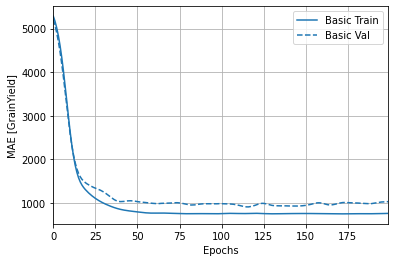

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

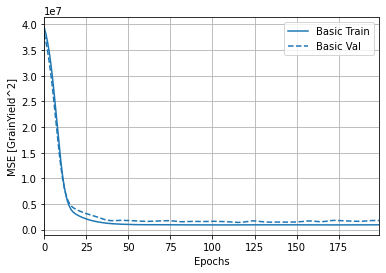

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(train_scaler_13w_X, train_13w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:43503172.0000,  mae:5647.1733,  mse:43503172.0000,  val_loss:44415200.0000,  val_mae:5774.3638,  val_mse:44415200.0000,  
....................................................................................................
Epoch: 100, loss:898108.6875,  mae:742.9586,  mse:898108.6875,  val_loss:1543877.8750,  val_mae:991.1651,  val_mse:1543877.8750,  
......................

In [0]:
loss, mae, mse = model.evaluate(test_scaler_13w_X, test_13w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

4/4 - 0s - loss: 1597925.5000 - mae: 998.6393 - mse: 1597925.5000
Testing set Mean Abs Error: 998.64 GrainYield


Mean absolute error regression loss (Best is 0) = 998.63917
Mean squared error (Best is 0) = 1597925.46058
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 822.96466
Coefficient of determination (Best is 1) = 0.83405


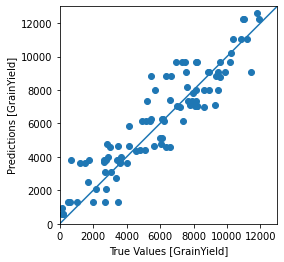

In [0]:
y_pred_13w_nn = model.predict(test_scaler_13w_X).flatten()
modelEvaluation(test_13w_y, y_pred_13w_nn)

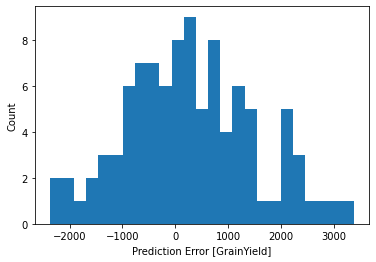

In [0]:
errorPlot(test_13w_y, y_pred_13w_nn)

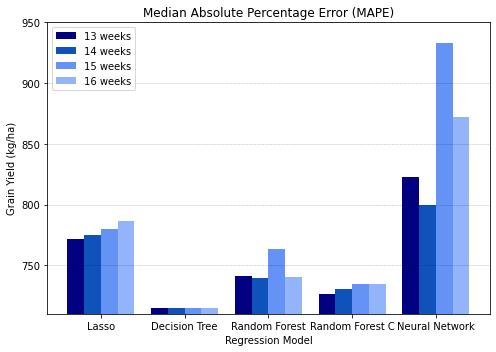

In [0]:
data = np.array([[median_absolute_error(test_13w_y, y_pred_13w_lm), median_absolute_error(test_14w_y, y_pred_14w_lm), median_absolute_error(test_15w_y, y_pred_15w_lm), median_absolute_error(test_16w_y, y_pred_16w_lm)],
                 [median_absolute_error(test_13w_y, y_pred_13w_dtr), median_absolute_error(test_14w_y, y_pred_14w_dtr), median_absolute_error(test_15w_y, y_pred_15w_dtr), median_absolute_error(test_16w_y, y_pred_16w_dtr)],
                 [median_absolute_error(test_13w_y, y_pred_13w_rfr), median_absolute_error(test_14w_y, y_pred_14w_rfr), median_absolute_error(test_15w_y, y_pred_15w_rfr), median_absolute_error(test_16w_y, y_pred_16w_rfr)],
                 [median_absolute_error(test_13w_y, y_pred_13w_rfrc), median_absolute_error(test_14w_y, y_pred_14w_rfrc), median_absolute_error(test_15w_y, y_pred_15w_rfrc), median_absolute_error(test_16w_y, y_pred_16w_rfrc)],
                 [median_absolute_error(test_13w_y, y_pred_13w_nn), median_absolute_error(test_14w_y, y_pred_14w_nn), median_absolute_error(test_15w_y, y_pred_15w_nn), median_absolute_error(test_16w_y, y_pred_16w_nn)]])
length = len(data)
x_labels = ['Lasso', 'Decision Tree', 'Random Forest', 'Random Forest C', 'Neural Network']

# Set plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='13 weeks')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='14 weeks')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='15 weeks')
ax.bar(x + (3 * width), data[:,3], width, color='#93b4fa', label='16 weeks')


ax.set_ylim(710,950)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Grain Yield (kg/ha)')
ax.set_xlabel('Regression Model')
ax.set_title('Median Absolute Percentage Error (MAPE)')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

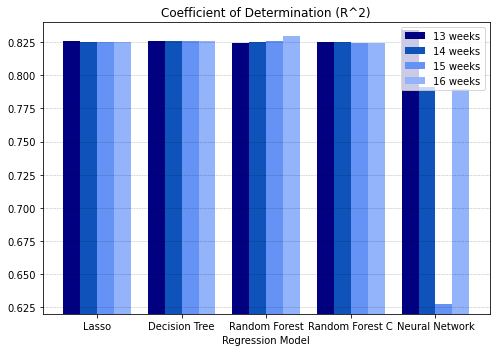

In [0]:
data = np.array([[r2_score(y_pred_13w_lm, test_13w_y), r2_score(y_pred_14w_lm, test_14w_y), r2_score(y_pred_15w_lm, test_15w_y), r2_score(y_pred_16w_lm, test_16w_y)],
                 [r2_score(y_pred_13w_dtr, test_13w_y), r2_score(y_pred_14w_dtr, test_14w_y), r2_score(y_pred_15w_dtr, test_15w_y), r2_score(y_pred_16w_dtr, test_16w_y)],
                 [r2_score(y_pred_13w_rfr, test_13w_y), r2_score(y_pred_14w_rfr, test_14w_y), r2_score(y_pred_15w_rfr, test_15w_y), r2_score(y_pred_16w_rfr, test_16w_y)],
                 [r2_score(y_pred_13w_rfrc, test_13w_y), r2_score(y_pred_14w_rfrc, test_14w_y), r2_score(y_pred_15w_rfrc, test_15w_y), r2_score(y_pred_16w_rfrc, test_16w_y)],
                 [r2_score(y_pred_13w_nn, test_13w_y), r2_score(y_pred_14w_nn, test_14w_y), r2_score(y_pred_15w_nn, test_15w_y), r2_score(y_pred_16w_nn, test_16w_y)]])
#r2_score(y_pred, test_y)
length = len(data)
x_labels = ['Lasso', 'Decision Tree', 'Random Forest', 'Random Forest C', 'Neural Network']

# Set plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='13 weeks')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='14 weeks')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='15 weeks')
ax.bar(x + (3 * width), data[:,3], width, color='#93b4fa', label='16 weeks')

ax.set_ylim(0.62,0.84)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Regression Model')
ax.set_title('Coefficient of Determination (R^2)')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()